In [1]:
from IPython.display import HTML

HTML('''
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
   $('div.input').hide();
 } else {
   $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form><input type="button" value="Toggle code" onclick="code_toggle()"></form>
''')


# Superstore Profitability Analysis

## Objective
This analysis evaluates the **key drivers of profitability** in the Superstore dataset, with particular attention to the role of discounts, customer segments, and product categories. The goal is to generate **actionable insights** that improve margins while sustaining revenue growth.

## Scope of Analysis
The assessment considers the **interplay of sales, profit, quantity, and discount**, and how these metrics vary across categories, sub-categories, customer segments, and regions. In addition, the study highlights **anomalies such as loss-making transactions** and quantifies the **impact of discounts and other variables** on profitability.  

The scope is designed to support:  
- **Pricing and discount optimization**  
- **Product mix and customer targeting strategies**  
- **Evidence-based recommendations** for sustainable profitability  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# Set the Matplotlib style to a Seaborn style without gridlines
sns.set_style("white")
sns.set_palette("bright")

In [3]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report


## Dataset & Structure
The dataset contains sales transactions with the following key variables:

- **Sales, Quantity, Discount, Profit**  
- **Region, Category, Sub-Category, Customer Segment**

This section explores **basic structure, summary statistics, and initial observations**.

**Key Questions:**
- Are there any extreme values or anomalies in profit or discount?  
- How do numerical features relate to each other? 

In [4]:
df = pd.read_csv('Superstore.csv', encoding='latin1')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


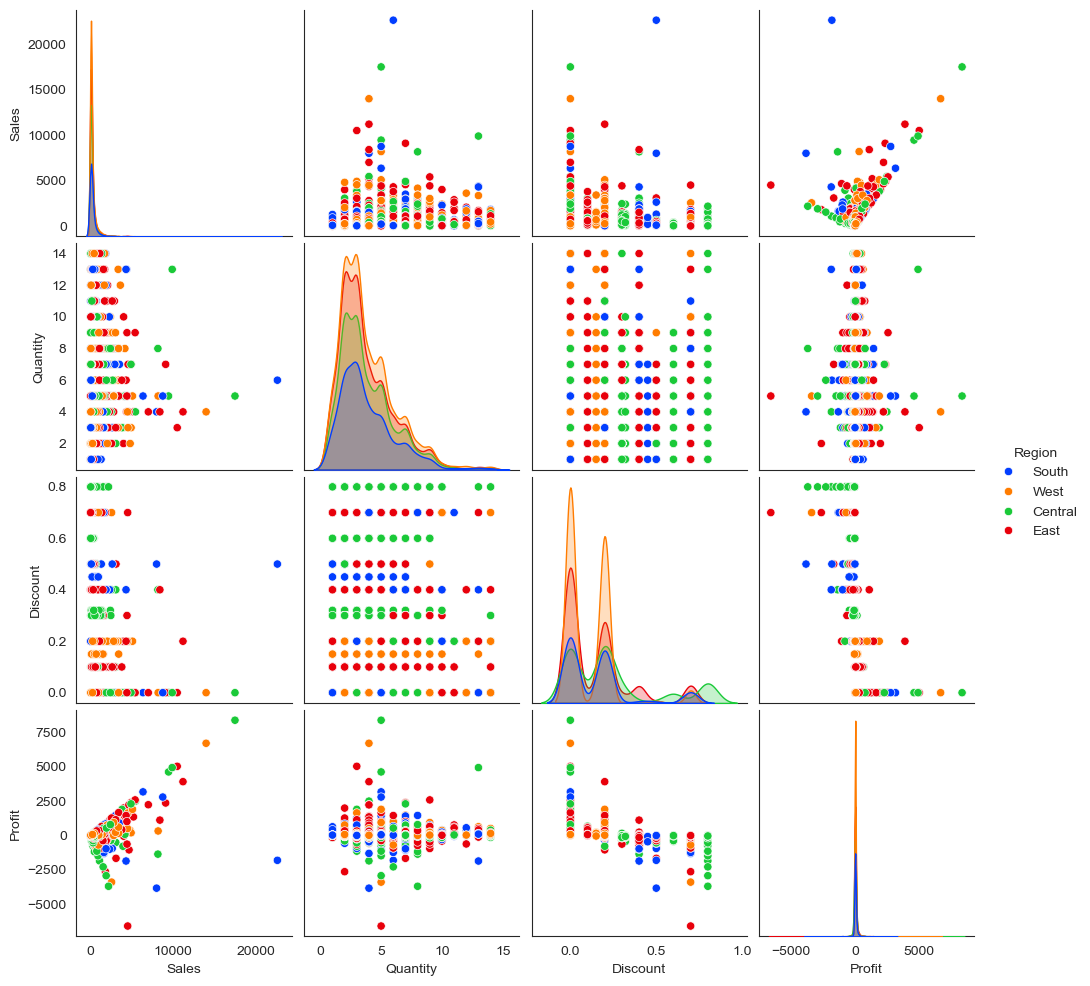

In [8]:
sns.pairplot(
    data=df,
    vars=['Sales', 'Quantity', 'Discount','Profit'],
    hue='Region'
)
plt.show()

**Initial Observations**  
- Profit ranges from <font color=red>-$6.6K </font> to positive values, indicating <span style="color:red"> some loss-making transactions  
- Discounts go up to <font color=red> 80%, potentially impacting profitability  
- Negative correlation between discount and profit is observed 

## Profitability by Category & Segment
Analyze **aggregate sales and profit** across **Category and Segment** to understand overall margins.  

**Key Questions:**
- Which categories and segments are most/least profitable?  
- How does removing loss-making transactions affect overall performance?  

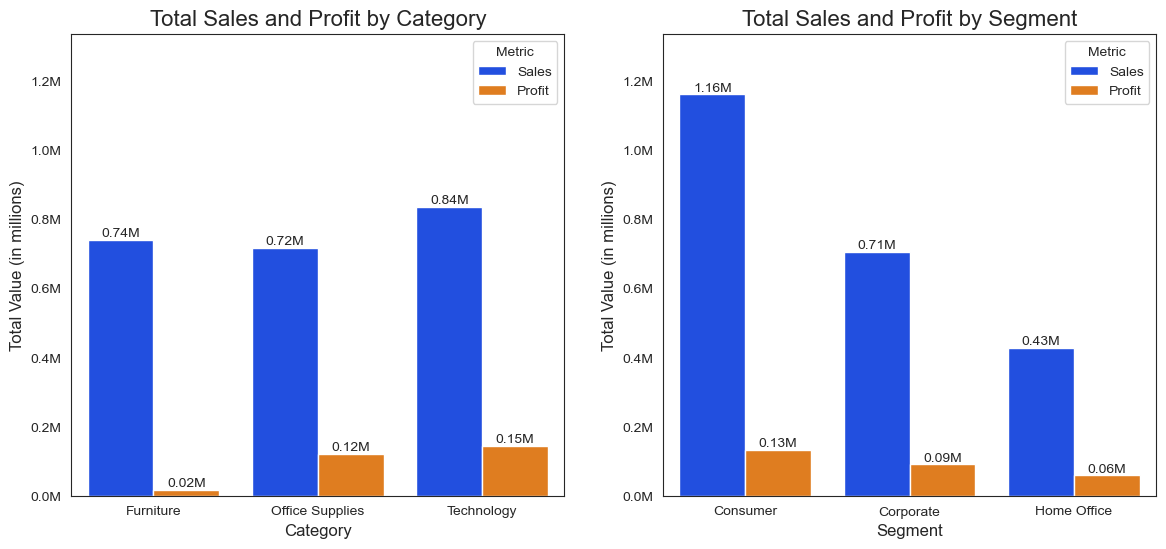

In [9]:
import matplotlib.ticker as ticker

# Data for the left chart (by Category)
grouped_category_df = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()
melted_category_df = grouped_category_df.melt(id_vars='Category', var_name='Metric', value_name='Total')

# Data for the right chart (by Segment)
grouped_segment_df = df.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()
melted_segment_df = grouped_segment_df.melt(id_vars='Segment', var_name='Metric', value_name='Total')

# Find the global max value for a consistent y-axis across both charts
max_value = max(melted_category_df['Total'].max(), melted_segment_df['Total'].max())
y_limit = max_value * 1.15 # Add a buffer for the labels

# Create a figure with two subplots side-by-side
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Define a formatter for the y-axis and data labels
def millions_formatter(x, pos):
    return f'{x / 1e6:,.1f}M'

# Left Chart: Category
sns.barplot(
    data=melted_category_df,
    x='Category',
    y='Total',
    hue='Metric',
    ax=ax[0]
)
ax[0].set_title('Total Sales and Profit by Category', fontsize=16)
ax[0].set_xlabel('Category', fontsize=12)
ax[0].set_ylabel('Total Value (in millions)', fontsize=12)
ax[0].set_ylim(0, y_limit) # Set the consistent y-axis limit
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter)) # Format y-axis to millions

# Data labels for the left chart
for container in ax[0].containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax[0].text(
                bar.get_x() + bar.get_width() / 2,
                height,
                f'{height / 1e6:,.2f}M',
                ha='center',
                va='bottom',
                fontsize=10
            )

# Right Chart: Segment
sns.barplot(
    data=melted_segment_df,
    x='Segment',
    y='Total',
    hue='Metric',
    ax=ax[1]
)
ax[1].set_title('Total Sales and Profit by Segment', fontsize=16)
ax[1].set_xlabel('Segment', fontsize=12)
ax[1].set_ylabel('Total Value (in millions)', fontsize=12)
ax[1].set_ylim(0, y_limit) # Set the consistent y-axis limit
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter)) # Format y-axis to millions

# Data labels for the right chart
for container in ax[1].containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax[1].text(
                bar.get_x() + bar.get_width() / 2,
                height,
                f'{height / 1e6:,.2f}M',
                ha='center',
                va='bottom',
                fontsize=10
            )

plt.show()

**Key Insights:**
- <font color=red> Furniture margin is only 3%</font>, while Office Supplies and Technology are ~17–18%  
- Profit margin by segment ranges from 11% to 14%  


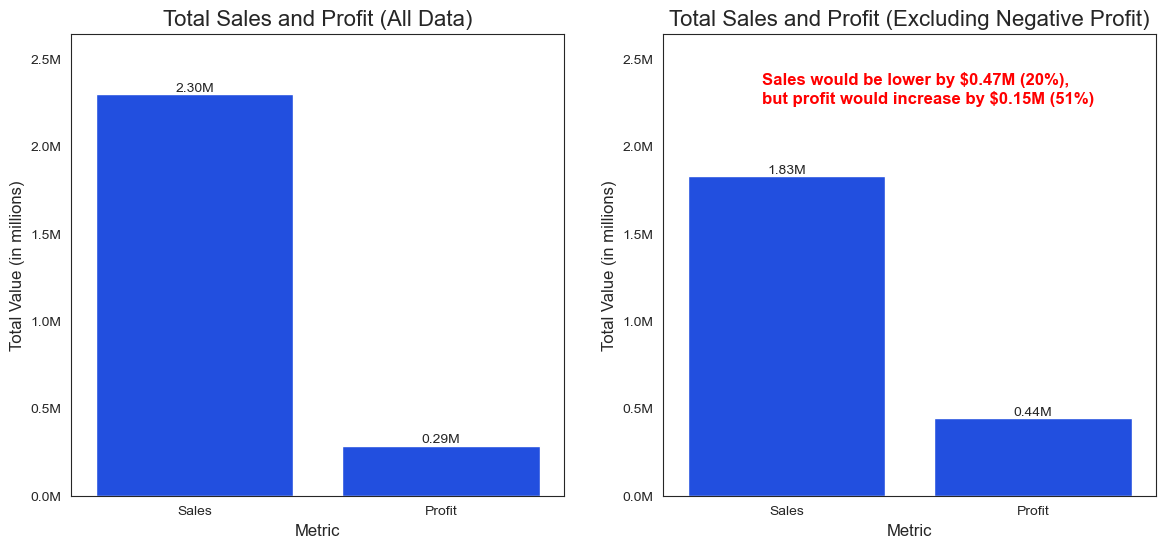

In [10]:
# Data for left chart - all data
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
data = {'Metric': ['Sales', 'Profit'],
        'Total': [total_sales, total_profit]}
plot_df = pd.DataFrame(data)

# Data for right chart - excluding sales with negative profit
df_filtered = df[df['Profit'] >= 0]
total_sales_filtered = df_filtered['Sales'].sum()
total_profit_filtered = df_filtered['Profit'].sum()
data_filtered = {'Metric': ['Sales', 'Profit'],
        'Total': [total_sales_filtered, total_profit_filtered]}
plot_df_filtered = pd.DataFrame(data_filtered)

# Create a formatter function for millions
def millions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'

# create side by side view
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Find the global y-axis limits
max_y_value = max(plot_df['Total'].max(), plot_df_filtered['Total'].max())
y_limit = max_y_value * 1.15

# Left chart - all data
sns.barplot(x='Metric', y='Total', data=plot_df, ax=ax[0])
ax[0].set_title('Total Sales and Profit (All Data)', fontsize=16)
ax[0].set_xlabel('Metric', fontsize=12)
ax[0].set_ylabel('Total Value (in millions)', fontsize=12)
ax[0].set_ylim(0, y_limit)
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

# Add annotations in millions
for index, row in plot_df.iterrows():
    ax[0].text(index, row.Total, f'{row.Total / 1e6:,.2f}M', ha='center', va='bottom', fontsize=10)


# Right chart - excluding sales with negative profit
sns.barplot(x='Metric', y='Total', data=plot_df_filtered, ax=ax[1])
ax[1].set_title('Total Sales and Profit (Excluding Negative Profit)', fontsize=16)
ax[1].set_xlabel('Metric', fontsize=12)
ax[1].set_ylabel('Total Value (in millions)', fontsize=12)
ax[1].set_ylim(0, y_limit)
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

# Add annotations in millions
for index, row in plot_df_filtered.iterrows():
    ax[1].text(index, row.Total, f'{row.Total / 1e6:,.2f}M', ha='center', va='bottom', fontsize=10)

ax[1].text(0.2, 0.85, 'Sales would be lower by $0.47M (20%),\nbut profit would increase by $0.15M (51%)', 
           transform=ax[1].transAxes,  fontsize=12, color='red', fontweight='bold')  


# Show the combined plot
plt.show()

**Key Insights:**
- Loss-making transactions materially reduce overall profitability


## Key Drivers of Profitability
Use **decision tree modeling** to identify primary factors impacting profit.  

**Key Questions:**
- Which factors most strongly separate profitable from loss-making transactions?  
- Are there thresholds (e.g., discount levels) that indicate risk?

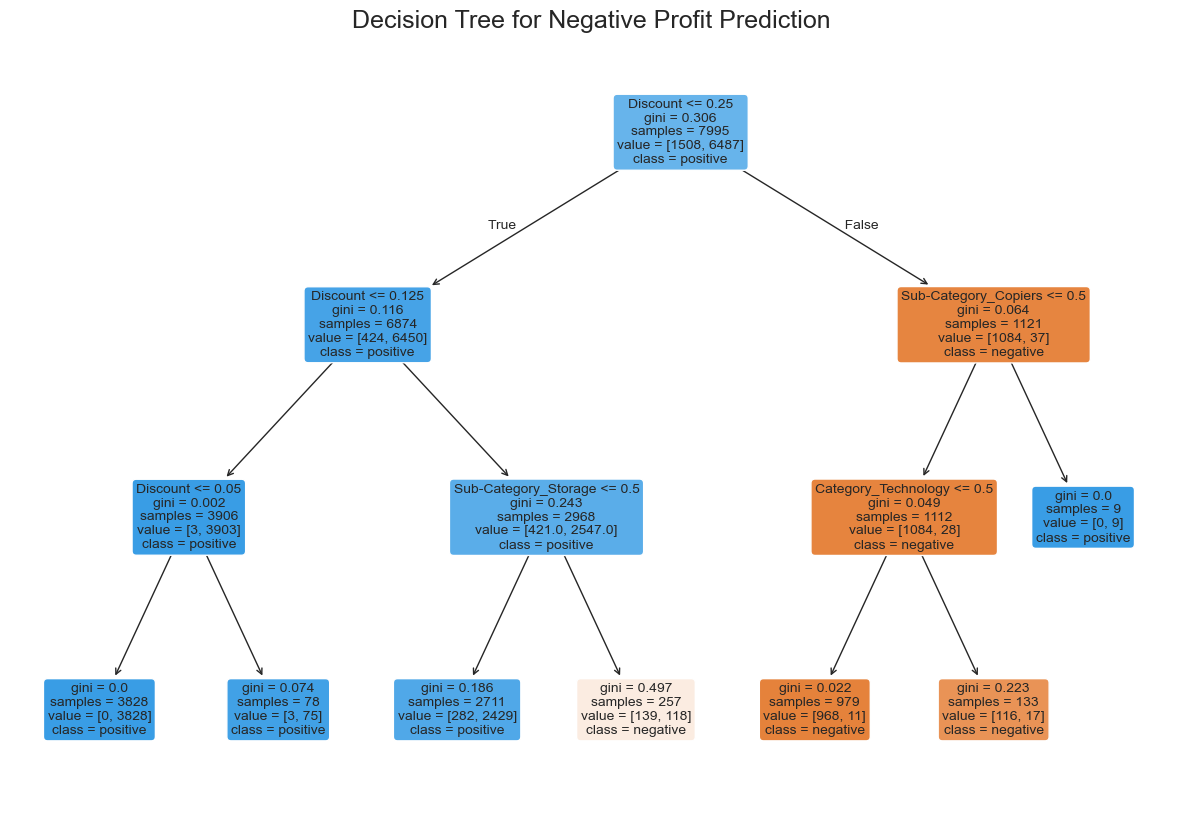

Feature Importances:
Sales: 0.00
Quantity: 0.00
Discount: 0.94
Category_Furniture: 0.00
Category_Office Supplies: 0.00
Category_Technology: 0.00
Sub-Category_Accessories: 0.00
Sub-Category_Appliances: 0.00
Sub-Category_Art: 0.00
Sub-Category_Binders: 0.00
Sub-Category_Bookcases: 0.00
Sub-Category_Chairs: 0.00
Sub-Category_Copiers: 0.01
Sub-Category_Envelopes: 0.00
Sub-Category_Fasteners: 0.00
Sub-Category_Furnishings: 0.00
Sub-Category_Labels: 0.00
Sub-Category_Machines: 0.00
Sub-Category_Paper: 0.00
Sub-Category_Phones: 0.00
Sub-Category_Storage: 0.05
Sub-Category_Supplies: 0.00
Sub-Category_Tables: 0.00
Region_Central: 0.00
Region_East: 0.00
Region_South: 0.00
Region_West: 0.00
Segment_Consumer: 0.00
Segment_Corporate: 0.00
Segment_Home Office: 0.00


In [11]:
# Step 1: Pre-process the data
# Create a binary target variable for profit: 'negative' or 'positive'
df['Profit_Class'] = df['Profit'].apply(lambda x: 'negative' if x < 0 else 'positive')

# Define a broader set of potential features
# The decision tree will automatically select the most important ones
features = ['Category', 'Sub-Category', 'Region', 'Segment', 'Sales', 'Quantity', 'Discount']
target = 'Profit_Class'

# Convert categorical features to dummy variables
# The numerical features will be included as they are
X = pd.get_dummies(df[features])
y = df[target]

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Decision Tree model
# Set a max_depth to keep the tree simple and easy to interpret
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Step 4: Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(
    model,
    filled=True,
    feature_names=X.columns,
    class_names=model.classes_,
    rounded=True,
    fontsize=10
)
plt.title('Decision Tree for Negative Profit Prediction', fontsize=18)
plt.show()

# Optional: Print the feature importances to see which features were most predictive
print("Feature Importances:")
for feature, importance in zip(X.columns, model.feature_importances_):
    print(f"{feature}: {importance:.2f}")

**Key Insights:**
- <font color=red>Discount is overwhelmingly the most important factor (0.94 importance)</font>  
- Sub-Category_Storage (0.05) and Sub-Category_Copiers (0.01) have minor influence  
- All other factors** are largely irrelevant  

## Discount Analysis
Review discount distribution by **Category, Region, and Segment** to identify focus areas.  

**Key Questions:**
- Where are high-risk discounts concentrated?  
- Which categories or segments may require deeper investigation?  

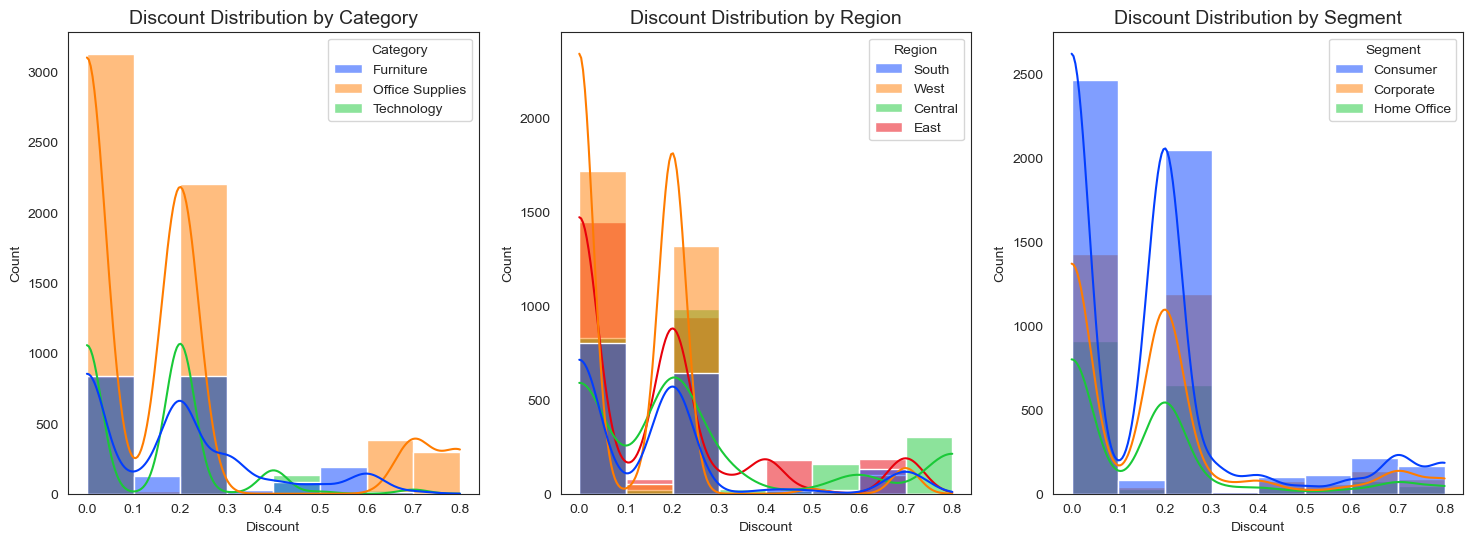

In [12]:
# Create a figure with three subplots
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# --- Left Chart (from your code): Histogram ---
sns.histplot(
    data=df,
    x='Discount',
    hue='Category',
    kde=True,
    bins=8,
    ax=ax[0]
)
ax[0].set_title('Discount Distribution by Category', fontsize=14)
ax[0].set_xlabel('Discount', fontsize=10)
ax[0].set_ylabel('Count', fontsize=10)


# --- Middle Chart: Histogram ---
sns.histplot(
     data=df,
    x='Discount',
    hue='Region',
    kde=True,
    bins=8,
    ax=ax[1]
)
ax[1].set_title('Discount Distribution by Region', fontsize=14)
ax[1].set_xlabel('Discount', fontsize=10)
ax[1].set_ylabel('Count', fontsize=10)

# --- Right Chart: Histogram ---
sns.histplot(
     data=df,
    x='Discount',
    hue='Segment',
    kde=True,
    bins=8,
    ax=ax[2]
)
ax[2].set_title('Discount Distribution by Segment', fontsize=14)
ax[2].set_xlabel('Discount', fontsize=10)
ax[2].set_ylabel('Count', fontsize=10)

# Show the plots
plt.show()

**Key Insights:**
- Histograms show discounts range from 0% to 80%  
- Based on the **25% “rule of thumb”** from the decision tree, deeper dives are recommended for:  
  - Office Supplies category  
  - Central region  
  - Consumer segment

## Scenario Analysis: Capping Discounts at 25% and 50%
Simulate the effect of **capping discounts at 25% and 50%** on sales and profit.

In [13]:
def run_scenario_analysis(df, new_discount_cap, high_discount_threshold):
    """
    Runs a scenario analysis by capping high discounts and calculating the impact.
    
    Args:
        df (pd.DataFrame): The original DataFrame.
        new_discount_cap (float): The new discount cap for all high-discount transactions.
        high_discount_threshold (float): The threshold to identify high-discount transactions.
    """
    # Create a copy of the DataFrame for the scenario analysis
    df_scenario = df.copy()

    # Identify all rows where the discount is greater than the threshold
    high_discount_mask = df_scenario['Discount'] > high_discount_threshold

    # Recalculate Sales and Profit for those rows with the new discount cap
    df_scenario.loc[high_discount_mask, 'Sales'] = \
        df_scenario.loc[high_discount_mask, 'Sales'] / (1 - df_scenario.loc[high_discount_mask, 'Discount']) * (1 - new_discount_cap)
    
    # Calculate Original_Cost (Cost of goods remains constant)
    original_cost = df.loc[high_discount_mask, 'Sales'] - df.loc[high_discount_mask, 'Profit']
    
    # Recalculate Profit based on new Sales and constant Cost
    df_scenario.loc[high_discount_mask, 'Profit'] = \
        df_scenario.loc[high_discount_mask, 'Sales'] - original_cost

    # Compare the overall impact on Sales and Profit
    original_sales_total = df['Sales'].sum()
    scenario_sales_total = df_scenario['Sales'].sum()

    original_profit_total = df['Profit'].sum()
    scenario_profit_total = df_scenario['Profit'].sum()

    print(f"--- Scenario: New Discount Cap at {new_discount_cap*100:.0f}% for Discounts > {high_discount_threshold*100:.0f}% ---")
    print(f"Original Total Sales: ${original_sales_total:,.2f}")
    print(f"Scenario Total Sales: ${scenario_sales_total:,.2f}")
    print(f"Sales Increase: ${scenario_sales_total - original_sales_total:,.2f}, +{(scenario_sales_total - original_sales_total)/original_sales_total*100:,.2f}%\n")

    print(f"Original Total Profit: ${original_profit_total:,.2f}")
    print(f"Scenario Total Profit: ${scenario_profit_total:,.2f}")
    print(f"Profit Increase: ${scenario_profit_total - original_profit_total:,.2f}, +{(scenario_profit_total - original_profit_total)/original_profit_total*100:,.2f}%")


In [14]:
run_scenario_analysis(df, new_discount_cap=0.25, high_discount_threshold=0.25)

--- Scenario: New Discount Cap at 25% for Discounts > 25% ---
Original Total Sales: $2,297,200.86
Scenario Total Sales: $2,480,019.28
Sales Increase: $182,818.42, +7.96%

Original Total Profit: $286,397.02
Scenario Total Profit: $469,215.44
Profit Increase: $182,818.42, +63.83%


In [15]:
run_scenario_analysis(df, new_discount_cap=0.5, high_discount_threshold=0.50)

--- Scenario: New Discount Cap at 50% for Discounts > 50% ---
Original Total Sales: $2,297,200.86
Scenario Total Sales: $2,351,387.86
Sales Increase: $54,187.00, +2.36%

Original Total Profit: $286,397.02
Scenario Total Profit: $340,584.02
Profit Increase: $54,187.00, +18.92%


**Key Insights:**
- Controlling extreme discounts has a material impact on profitability

## Statistical Validation: Logistic Regression
Assess contribution of each factor to the **probability of a loss** using logistic regression.

In [16]:
# Binary outcome: 1 for loss, 0 for profit
df['is_loss'] = (df['Profit'] < 0).astype(int)

# Features
feature_columns = ['Sub-Category', 'Region', 'Segment', 'Sales', 'Quantity', 'Discount']
X = pd.get_dummies(df[feature_columns], drop_first=True)
y = df['is_loss']

# Scale continuous features
scaler = StandardScaler()
X[['Sales', 'Quantity', 'Discount']] = scaler.fit_transform(X[['Sales', 'Quantity', 'Discount']])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Logistic Regression with balancing
log_reg_model = LogisticRegression(
    solver="lbfgs", max_iter=1000, class_weight="balanced"
)
log_reg_model.fit(X_train, y_train)

# Coefficients as odds ratios
odds_ratios = np.exp(log_reg_model.coef_[0])
coef_table = pd.DataFrame({
    "Feature": X.columns,
    "Log-Odds": log_reg_model.coef_[0],
    "Odds Ratio": odds_ratios
}).sort_values(by="Odds Ratio", ascending=False)

print(coef_table)
print(f"Intercept: {log_reg_model.intercept_[0]:.4f}")

# Classification metrics
y_pred = log_reg_model.predict(X_test)
print(classification_report(y_test, y_pred))

                     Feature  Log-Odds  Odds Ratio
2                   Discount  5.468376  237.074760
6     Sub-Category_Bookcases  1.399521    4.053256
16      Sub-Category_Storage  1.161513    3.194764
18       Sub-Category_Tables  1.072262    2.921981
17     Sub-Category_Supplies  0.741666    2.099431
7        Sub-Category_Chairs  0.618874    1.856835
21               Region_West  0.252546    1.287299
19               Region_East  0.157036    1.170038
23       Segment_Home Office  0.093718    1.098250
20              Region_South  0.039017    1.039788
1                   Quantity -0.098625    0.906083
0                      Sales -0.118112    0.888596
22         Segment_Corporate -0.294725    0.744736
10    Sub-Category_Fasteners -0.467557    0.626531
11  Sub-Category_Furnishings -0.920780    0.398208
15       Sub-Category_Phones -1.221853    0.294684
13     Sub-Category_Machines -2.550233    0.078063
3    Sub-Category_Appliances -3.051383    0.047293
9     Sub-Category_Envelopes -3

**Key Insights:**
- <font color=red>**Discount (Odd Ratio = 237.07)**: the single most powerful driver of loss.</font>
- <font color="red">**Other strong drivers of loss**: Bookcases (OR = 4.05), Storage (3.19), Tables (2.99), Supplies (2.10), Chairs (1.86) </font>  
- <font color="green">**Drivers of profit** (protective factors): Binders (OR = 0.01), Paper (0.01), Copiers (0.02), Art (0.02) and small office items such as Labels (0.04), Envelopes (0.06), Appliances (0.05), Machines (0.08)
- The Corporate segment (OR=0.74) drives profit better than Home Office (1.09)
- Regions, Sales and Quantity have minor predictive effect on profit



## Concentration of Losses
Examine **loss-making transactions by Sub-Category** and mean discount differences.  

**Key Questions:**
- Which sub-categories contribute most to losses?  
- Are there sub-categories that remain profitable despite high discounts? 

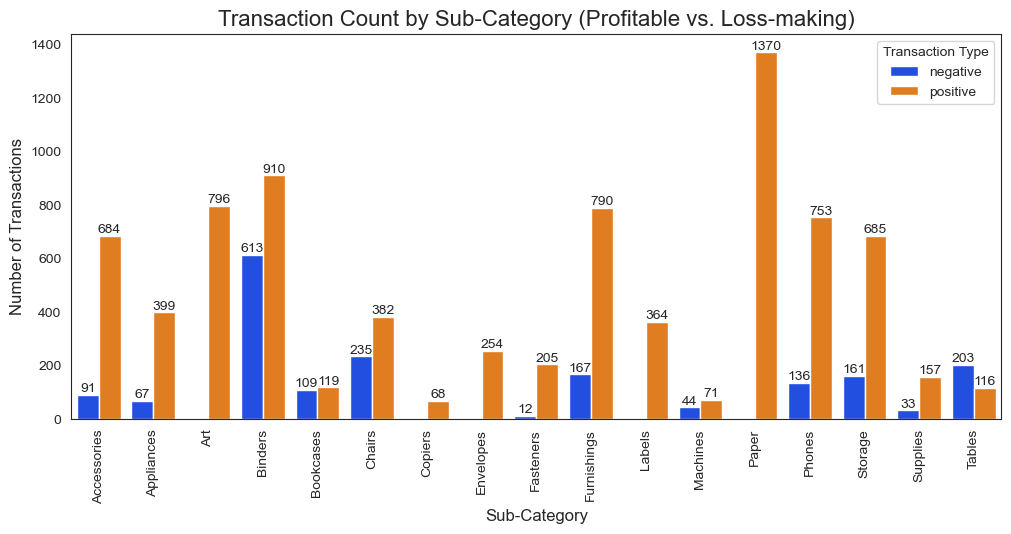

In [17]:
# Create the count_df from the original df
count_df = df.groupby(['Sub-Category', 'Profit_Class'])['Row ID'].count().reset_index()

# Rename the columns for plotting clarity
count_df.rename(columns={'Profit_Class': 'Transaction Type', 'Row ID': 'Count'}, inplace=True)

# Set up the plot
plt.figure(figsize=(12, 5))
ax = sns.barplot(
    data=count_df,
    x='Sub-Category',
    y='Count',
    hue='Transaction Type'
)

# Add data labels using the cleaner ax.bar_label() method
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

# Add labels and title
plt.title('Transaction Count by Sub-Category (Profitable vs. Loss-making)', fontsize=16)
plt.xlabel('Sub-Category', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=90)

# Show the plot
plt.show()

Table of Mean Discount by Sub-Category with Difference:
Profit_Class Sub-Category  negative  positive  Difference in Mean Discount
6                 Copiers  0.000000  0.161765                     0.161765
7               Envelopes  0.000000  0.080315                     0.080315
12                  Paper  0.000000  0.074891                     0.074891
2                     Art  0.000000  0.074874                     0.074874
10                 Labels  0.000000  0.068681                     0.068681
8               Fasteners  0.200000  0.075122                    -0.124878
0             Accessories  0.200000  0.062281                    -0.137719
5                  Chairs  0.261277  0.114136                    -0.147140
15               Supplies  0.200000  0.050955                    -0.149045
14                Storage  0.200000  0.045255                    -0.154745
13                 Phones  0.342647  0.120584                    -0.222063
4               Bookcases  0.348532  0.08529

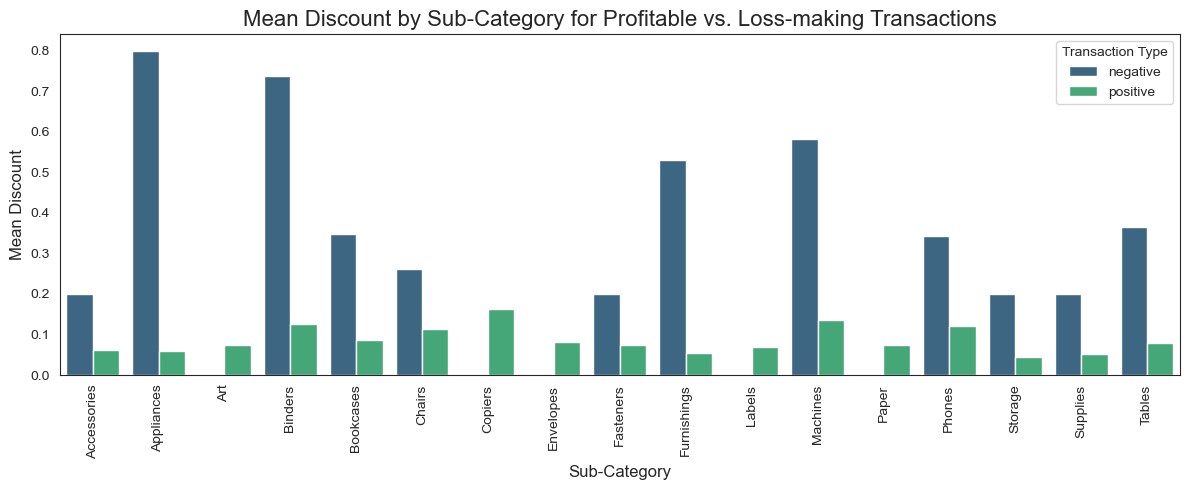

In [18]:
# Group by both Sub-Category and Profit_Class to get the mean discount
discount_df = df.groupby(['Sub-Category', 'Profit_Class'])['Discount'].mean().reset_index()

# Pivot the table to get the side-by-side columns
comparison_df = discount_df.pivot(
    index='Sub-Category',
    columns='Profit_Class',
    values='Discount'
).fillna(0).reset_index()

# To generate the chart, first melt the data before adding the difference column
plot_df = pd.melt(
    comparison_df,
    id_vars=['Sub-Category'],
    var_name='Transaction Type',
    value_name='Mean Discount'
)

# Now, add the difference column to the comparison_df for the table only
comparison_df['Difference in Mean Discount'] = comparison_df['positive'] - comparison_df['negative']

# Sort the DataFrame by the difference column to highlight the largest disparities
comparison_df.sort_values(by='Difference in Mean Discount', ascending=False, inplace=True)

# Print the table with the new column
print("Table of Mean Discount by Sub-Category with Difference:")
print(comparison_df.to_string())

# Create a grouped bar chart from the 'plot_df'
plt.figure(figsize=(12, 5))
sns.barplot(
    data=plot_df,
    x='Sub-Category',
    y='Mean Discount',
    hue='Transaction Type',
    palette='viridis'
)

plt.title('Mean Discount by Sub-Category for Profitable vs. Loss-making Transactions', fontsize=16)
plt.xlabel('Sub-Category', fontsize=12)
plt.ylabel('Mean Discount', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

**Key Insights:**
- <font color=red>**Tables sub-category** has more loss-making than profitable transactions → **priority area** </font> 
- Art, Copiers, Envelopes, and Paper remain profitable even with high discounts  
- Magnitude of **mean discount differences** provides clues for further investigation

## Recommendations & Next Steps
1. **Implement discount controls** for high-risk categories and segments, particularly Furniture and Tables  
2. **Monitor and review high-discount transactions** for Central region and Consumer segment  
3. **Share loss transaction reports** with regional managers for targeted follow-up  
4. **Consider pricing strategy adjustments** to protect margin while sustaining sales  
5. **Continuous monitoring:** revisit decision tree and logistic regression models periodically to capture evolving patterns
6. **Design Incentives** → reward sales teams on margin, not just volume 

**Overall Message:** by **targeting discount policies and understanding loss drivers**, the company can substantially increase profitability while maintaining sales performance.


## Actionable Outputs
**Purpose:** Deliver ready-to-use files for further stakeholder action  

- **Loss-making transaction reports** by region for regional managers  


In [19]:
# Create a subset of df where profit is < 0
loss_df = df[(df['Profit'] < 0)]

# Get the unique regions from the DataFrame
unique_regions = loss_df['Region'].unique()

# Loop through each region and save the data to a separate Excel file
for region in unique_regions:
    # Filter the DataFrame for the current region
    regional_df = loss_df[loss_df['Region'] == region]

    # Create a descriptive filename
    filename = f"Losses_for_{region}.xlsx"

    # Save the DataFrame to an Excel file
    regional_df.to_excel(filename, index=False)

    print(f"File '{filename}' has been created.")

File 'Losses_for_South.xlsx' has been created.
File 'Losses_for_Central.xlsx' has been created.
File 'Losses_for_East.xlsx' has been created.
File 'Losses_for_West.xlsx' has been created.
